## Description of the ODE System and Their Solutions

We consider the system of two differential equations:

$$
\begin{cases}
\displaystyle \frac{dx}{dt} \;=\; f(x) \;=\; -\,\alpha\,\bigl(1 - x\bigr)\,\bigl(x - x^*\bigr),\\[1em]
\displaystyle \frac{dy}{dt} \;=\; y\,f'(x)\;+\;x\;+\;f(x),
\end{cases}
$$
where \(\alpha\) and \(x^*\) are given real parameters, and the initial conditions are \(\displaystyle x(0) = x_0\) and \(\displaystyle y(0) = y_0\).

---

### 1. Closed‐Form for \(x(t)\)

A direct separation of variables on 
$$
\frac{dx}{dt} \;=\; -\,\alpha\,\bigl(1 - x\bigr)\,\bigl(x - x^*\bigr)
$$
yields the **logistic‐type** closed‐form solution

$$
x(t) 
\;=\; 
\frac{x^* + D\,e^{-\alpha(1 - x^*)\,t}}
     {\,1 + D\,e^{-\alpha(1 - x^*)\,t}},
\quad
\text{where}
\quad
D
\;=\;
\frac{x_0 - x^*}{\,1 - x_0\,}.
$$

---

### 2. Closed‐Form for \(y(t)\)

We rewrite the second equation in linear‐in‐\(y\) form:
$$
\frac{dy}{dt}
\;-\;
f'(x)\,y
\;=\;
x \;+\; f(x).
$$
An integrating‐factor approach or direct substitution \( d\tau = dx / f(x) \) shows that

$$
y(t)
\;=\;
\frac{(1 - x(t))\,\bigl(x(t) - x^*\bigr)}
     {\bigl(1 - x(0)\bigr)\,\bigl(x(0) - x^*\bigr)} 
\;y(0)
\;+\;
(1 - x(t))\,\bigl(x(t) - x^*\bigr)
\int_{0}^{t}\!\Bigl[\tfrac{x(\tau)}{\bigl(1 - x(\tau)\bigr)\,\bigl(x(\tau) - x^*\bigr)}
\;-\;\alpha\Bigr]d\tau.
$$

To eliminate the integral, we use partial fractions on
$$
\int
\frac{x}{(1 - x)^2 \,(x - x^*)^2}\,dx,
$$
obtaining a combination of logarithmic and rational terms.  Defining
$$
I(x)
\;=\;
\frac{1 + x^*}{(1 - x^*)^3}\,
\ln\!\Bigl|\tfrac{x - x^*}{\,1 - x\,}\Bigr|
\;+\;
\frac{1}{(1 - x^*)^2}\,\frac{1}{\,1 - x\,}
\;-\;
\frac{x^*}{(1 - x^*)^2}\,\frac{1}{\,x - x^*\,},
$$
the integral from $x(0)$ to $x(t)$ is $I\bigl(x(t)\bigr) - I\bigl(x(0)\bigr)$.  This results in the **full** closed‐form expression for \(y(t)\):

$$
y(t)
\;=\;
\frac{(1 - x(t))\,\bigl(x(t) - x^*\bigr)}
     {\bigl(1 - x(0)\bigr)\,\bigl(x(0) - x^*\bigr)}\;y(0)
\;+\;
(1 - x(t))\,\bigl(x(t) - x^*\bigr)
\biggl[
-\;\frac{1}{\alpha}\bigl(I\bigl(x(t)\bigr) - I\bigl(x(0)\bigr)\bigr)
\;-\;\alpha\,t
\biggr].
$$

Thus, the overall solution $\bigl[x(t),\,y(t)\bigr]$ is completely specified in **closed form** via exponentials, logarithms, and rational functions.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


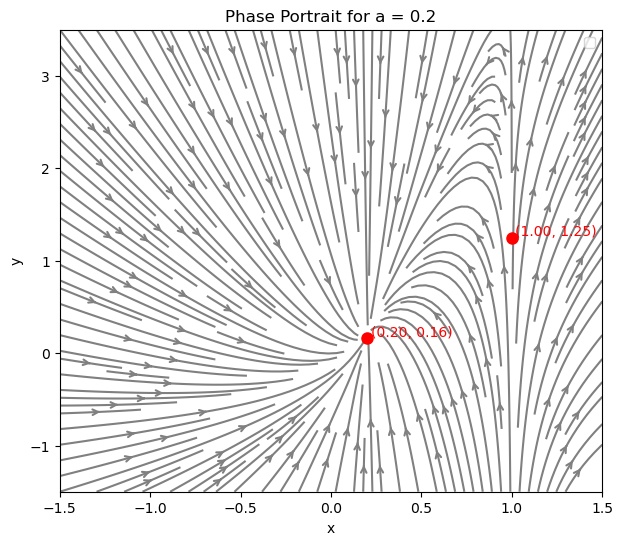

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def system(t, Y, a, b):
    """
    Right-hand side of the ODE system:
      dx/dt = -(1 - x)*(x - a)
      dy/dt = -y*(1 + a - x) + x
    
    Y is the vector (x, y).
    a is a parameter in (0,1).
    """
    x, y = Y
    dxdt = -(1 - x)*(x - a) * b
    dydt = -y*(1 + a - x) * b + x
    return [dxdt, dydt]

def find_equilibria(a, b):
    """
    Solve the equilibrium (fixed point) conditions:
      dx/dt = 0  =>  (1 - x)*(x - a) = 0
      dy/dt = 0  =>  -y(1 + a - 2 * x) * b + x = 0
    
    Fixed points come from x = 1 or x = a.
    Then we find the corresponding y in each case.
    """
    eq_pts = []
    
    # Case 1: x = a => dy/dt = 0 => -y(1 + a - a) + a = 0 => -y(1) + a = 0 => y = a
    eq_pts.append((1, 1/b/(1-a)))
    
    # Case 2: x = 1 => dy/dt = 0 => -y(1 + a - 1) + 1 = 0 => -y(a) + 1 = 0 => y = 1/a (if a != 0)
    if a != 0:
        eq_pts.append((a, a/b * (1-a)))
    
    return eq_pts

def main(a=0.3, b = 1.0, init_list=[(0.2, 0.0), (0.8, 0.4)],
         x_range=(-0.5, 1.5), y_range=(-0.5, 1.5), tmax=10):
    """
    Plots:
      1) A streamplot of the system dx/dt, dy/dt over x_range x y_range.
      2) Marks the system's equilibrium points.
      3) Numerically integrates and plots trajectories from each initial
         condition in init_list, over the time interval [0, tmax].
    
    Parameters:
    -----------
    a         : float, parameter in the ODE (0 < a < 1 recommended)
    init_list : list of (x0, y0) tuples for initial conditions
    x_range   : tuple (xmin, xmax)
    y_range   : tuple (ymin, ymax)
    tmax      : float, maximum integration time
    """
    # 1) Create a mesh for the streamplot
    Nx, Ny = 25, 25
    x_vals = np.linspace(x_range[0], x_range[1], Nx)
    y_vals = np.linspace(y_range[0], y_range[1], Ny)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    # 2) Evaluate dx/dt, dy/dt on the mesh
    DX = -(1 - X)*(X - a) * b
    DY = -Y*(1 + a - X) * b + X
    
    # 3) Prepare the figure
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f"Phase Portrait for a = {a}")
    
    # 4) Draw the streamplot
    ax.streamplot(X, Y, DX, DY, color='gray', density=2.0,
                  arrowsize=1, arrowstyle='->')
    
    # 5) Find the equilibria and mark them
    eq_pts = find_equilibria(a, b)
    for (xe, ye) in eq_pts:
        ax.plot(xe, ye, 'ro', ms=8)  # mark equilibrium
        ax.text(xe+0.02, ye+0.02,
                f"({xe:.2f}, {ye:.2f})",
                color='red', fontsize=10)
    
    # 6) For each initial condition, solve and plot trajectory
    for (x0, y0) in init_list:
        sol = solve_ivp(lambda t, Y: system(t, Y, a, b),
                        [0, tmax/b], [x0, y0],
                        dense_output=True, max_step=0.05)
        # Evaluate solution on a grid of time points for plotting
        t_eval = np.linspace(0, tmax/b, int(300/b))
        sol_vals = sol.sol(t_eval)
        
        ax.plot(sol_vals[0], sol_vals[1],
                lw=2, label=f"IC=({x0},{y0})")
        # mark start (circle) and end (square)
        ax.plot(sol_vals[0][0], sol_vals[1][0], 'o', color='blue')
        ax.plot(sol_vals[0][-1], sol_vals[1][-1], 's', color='blue')
    
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.legend()
    plt.show()

if __name__ == "__main__":
    # Example usage
    main(a=0.2, b= 1,
         init_list=[],
         # init_list=[(-0.99, -0.99), (-.5, -0.5),(0.5,0.5), (0.8, 0.8), (.9, .9), (0.99, .99),],
         x_range=(-1.5, 1.5),
         y_range=(-1.5, 3.5),
         tmax=10)


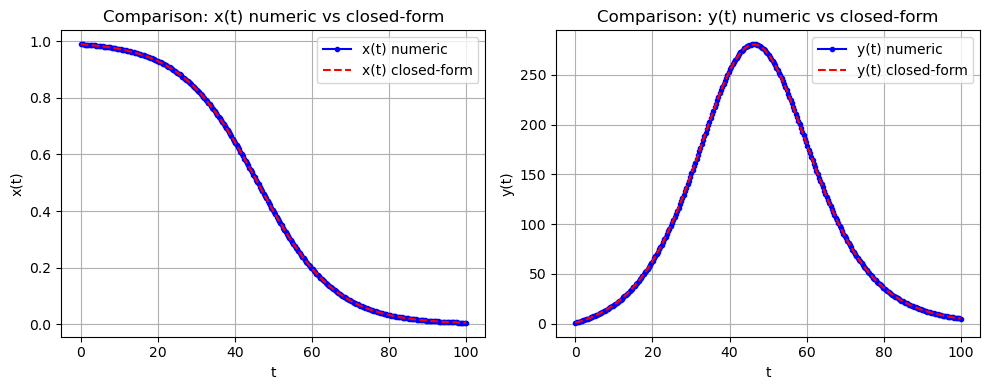

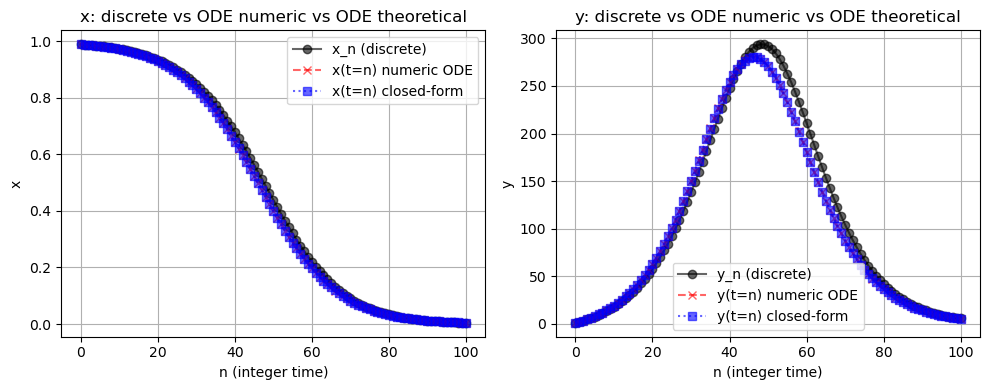

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_system(t, XY, alpha, x_star):
    """
    Right-hand side for the system:
      x' = f(x) = -alpha (1 - x)*(x - x_star)
      y' = y*f'(x) + x + f(x).
    """
    x, y = XY
    # f(x):
    fx = -alpha * (1 - x) * (x - x_star)
    # f'(x):
    fp = -alpha * ((1 + x_star) - 2*x)

    dxdt = fx
    dydt = y*fp + x + fx
    return [dxdt, dydt]

def x_closed_form(t, alpha, x_star, x0):
    """
    Closed-form solution for x(t):
      x(t) =  [ x_star + D * exp(-alpha(1 - x_star)*t ) ]
              / [ 1 + D * exp(-alpha(1 - x_star)*t ) ],
    where D = (x0 - x_star)/(1 - x0).
    """
    D = (x0 - x_star)/(1 - x0)
    num = x_star + D * np.exp(-alpha*(1 - x_star)*t)
    den = 1 + D * np.exp(-alpha*(1 - x_star)*t)
    return num/den

def y_closed_form(t_array, alpha, x_star, x0, y0):
    """
    Closed-form solution for y(t).
    We'll piece it together using partial-fraction integration.

    For each t, compute:
      x(t) = x_closed_form(t, ...)
      then y(t) = [some expression involving x(t), y0, alpha, etc.].
    """
    def I_of_x(x):
        """
        Helper function for the partial-fraction antiderivative that appears in y(t).
        """
        # For typical x in (0,1), etc. We ignore any singularities at x=1 or x=x_star.
        log_term = ((1 + x_star)/((1 - x_star)**3)) * np.log(abs((x - x_star)/(1 - x)))
        rational_1 = (1.0 / (1 - x_star)**2) * (1.0/(1 - x))
        rational_2 = -(x_star / (1 - x_star)**2) * (1.0/(x - x_star))
        return log_term + rational_1 + rational_2
    
    I_x0 = I_of_x(x0)  # evaluate integral at initial x0

    yvals = []
    for t in t_array:
        x_t = x_closed_form(t, alpha, x_star, x0)
        # Pre-factor
        prefactor = ((1 - x_t)*(x_t - x_star)) / ((1 - x0)*(x0 - x_star))
        # The integral difference:
        I_xt = I_of_x(x_t)
        integral_part = -(1.0/alpha)*(I_xt - I_x0) - alpha*t
        y_t = prefactor*y0 + (1 - x_t)*(x_t - x_star)*integral_part
        yvals.append(y_t)
    return np.array(yvals)

def y_closed_form(t_array, alpha, x_star, x0, y0):
    """
    Closed-form solution for y(t) under the assumption y(0) = x(0).
    In other words, we ignore the passed-in y0 and use y0 = x0 instead.
    
    For each t, we compute:
        x(t) = x_closed_form(t, ...)
        y(t) = (1 - x(t))*(x(t) - x_star)
               * [ - (1/alpha)*( I(x(t)) - I(x0) ) - alpha*t + c0 ],
    where
        c0 = x0 / ((1 - x0)*(x0 - x_star)), 
        I(x) is the partial-fraction antiderivative.
    """
    def I_of_x(x):
        """
        Helper function for the partial-fraction antiderivative that appears in y(t).
        Same as before.
        """
        log_term = ((1 + x_star)/((1 - x_star)**3)) * np.log(abs((x - x_star)/(1 - x)))
        rational_1 = (1.0 / (1 - x_star)**2) * (1.0/(1 - x))
        rational_2 = -(x_star / (1 - x_star)**2) * (1.0/(x - x_star))
        return log_term + rational_1 + rational_2
    
    # We assume y0 = x0, so we do NOT use y0 from the argument.
    I_x0 = I_of_x(x0)
    c0 = x0 / ((1 - x0)*(x0 - x_star))
    
    yvals = []
    for t in t_array:
        x_t = x_closed_form(t, alpha, x_star, x0)
        I_xt = I_of_x(x_t)
        
        # The "integral_part" from the derivation:
        integral_part = -(1.0/alpha)*(I_xt - I_x0) - alpha*t
        
        # Final simplified formula
        y_t = (1 - x_t)*(x_t - x_star)*(integral_part + c0)
        yvals.append(y_t)
    
    return np.array(yvals)



def discrete_simulation(alpha, x_star, x0, y0, steps):
    """
    Simulate the original discrete system for n = 0..steps:
      x_{n+1} = x_n + f(x_n),
      y_{n+1} = y_n + y_n f'(x_n) + x_{n+1}.

    Returns:
      x_dis, y_dis : arrays of length (steps+1) with the discrete solution.
    """
    x_dis = np.zeros(steps+1)
    y_dis = np.zeros(steps+1)
    x_dis[0] = x0
    y_dis[0] = y0
    
    for n in range(steps):
        # f(x_n)
        fx_n = -alpha * (1 - x_dis[n]) * (x_dis[n] - x_star)
        # x_{n+1}:
        x_dis[n+1] = x_dis[n] + fx_n
        # f'(x_n)
        fp_n = -alpha * ((1 + x_star) - 2*x_dis[n])
        # y_{n+1}:
        y_dis[n+1] = y_dis[n] + y_dis[n]*fp_n + x_dis[n+1]
    
    return x_dis, y_dis


def simulate_and_compare(alpha=1.0, x_star=0.3, x0=0.8, y0=0.2, T=5.0, N=300):
    """
    1) Numerically solve the system (ODE) from t=0 to t=T.
    2) Compare with the closed-form solutions for x(t) and y(t).
    3) Do the discrete simulation for n=0..floor(T).
    4) Compare all three approaches at integer times n = 0..floor(T).
    5) Plot results.
    """
    # Time points for integration
    t_eval = np.linspace(0, T, N)
    
    # Solve numerically
    sol = solve_ivp(ode_system, [0, T], [x0, y0],
                    args=(alpha, x_star), t_eval=t_eval, dense_output=False)
    
    # Numerical ODE solutions
    x_num = sol.y[0,:]
    y_num = sol.y[1,:]
    t_num = sol.t

    # Closed-form solutions at the same t_num
    x_theo = x_closed_form(t_num, alpha, x_star, x0)
    y_theo = y_closed_form(t_num, alpha, x_star, x0, y0)

    #
    # ==== 1) Plot: ODE numeric vs ODE closed-form ====
    #
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(t_num, x_num, 'b.-', label='x(t) numeric')
    plt.plot(t_num, x_theo, 'r--', label='x(t) closed-form')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Comparison: x(t) numeric vs closed-form')
    plt.legend()
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(t_num, y_num, 'b.-', label='y(t) numeric')
    plt.plot(t_num, y_theo, 'r--', label='y(t) closed-form')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title('Comparison: y(t) numeric vs closed-form')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #
    # ==== 2) Discrete simulation ====
    #
    steps = int(np.floor(T))  # number of integer steps to do
    x_dis, y_dis = discrete_simulation(alpha, x_star, x0, y0, steps)

    # To compare the discrete solution x_dis[n], y_dis[n] with the ODE solutions
    # at t = n, we can pick out the ODE solutions via interpolation.
    # Or, if N is large, we can simply do a fine interpolation or a direct pick.
    t_integers = np.arange(steps+1)  # 0,1,2,...,steps

    # ODE numeric solutions at integer times
    x_num_int = np.interp(t_integers, t_num, x_num)
    y_num_int = np.interp(t_integers, t_num, y_num)

    # ODE closed-form solutions at integer times
    x_theo_int = x_closed_form(t_integers, alpha, x_star, x0)
    y_theo_int = y_closed_form(t_integers, alpha, x_star, x0, y0)

    #
    # ==== 3) Plot all three approaches at integer times. ====
    #
    plt.figure(figsize=(10,4))
    
    # Left: x(n) vs n
    plt.subplot(1,2,1)
    plt.plot(t_integers, x_dis, 'ko-', label='x_n (discrete)', alpha=0.6)
    plt.plot(t_integers, x_num_int, 'rx--', label='x(t=n) numeric ODE', alpha=0.6)
    plt.plot(t_integers, x_theo_int, 'bs:', label='x(t=n) closed-form', alpha=0.6)
    plt.xlabel('n (integer time)')
    plt.ylabel('x')
    plt.title('x: discrete vs ODE numeric vs ODE theoretical')
    plt.legend()
    plt.grid(True)
    
    # Right: y(n) vs n
    plt.subplot(1,2,2)
    plt.plot(t_integers, y_dis, 'ko-', label='y_n (discrete)', alpha=0.6)
    plt.plot(t_integers, y_num_int, 'rx--', label='y(t=n) numeric ODE', alpha=0.6)
    plt.plot(t_integers, y_theo_int, 'bs:', label='y(t=n) closed-form', alpha=0.6)
    plt.xlabel('n (integer time)')
    plt.ylabel('y')
    plt.title('y: discrete vs ODE numeric vs ODE theoretical')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

#
# Example usage
#
if __name__ == '__main__':
    r = .99
    simulate_and_compare(
        alpha=0.1,      # set alpha
        x_star=.0,     # set x^*
        x0=r,           # initial x(0)
        y0=r,           # initial y(0)
        T=100.0          # final time
    )


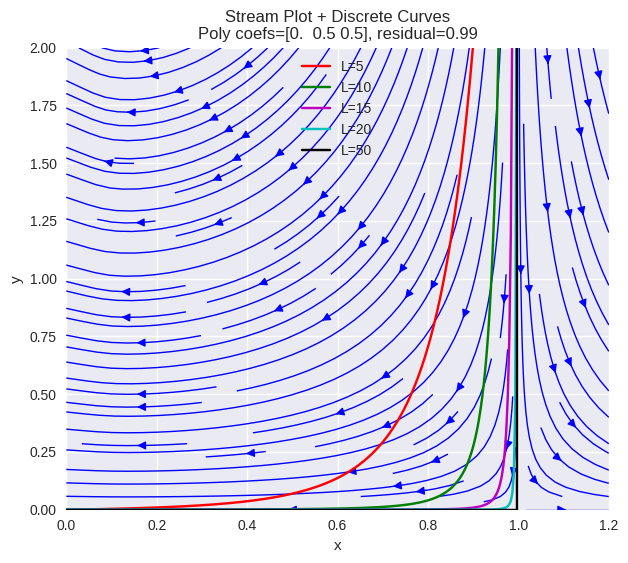

In [58]:
import numpy as np
import matplotlib.pyplot as plt

##############################################################################
# 1) FACTORY FOR k(x) AND k'(x):
#    Given polynomial coefficients (c_0, c_1, ..., c_N) and a residual strength r,
#      p(x) = c_0 + c_1*x + c_2*x^2 + ... + c_N*x^N,
#    define
#      k_res(x) = (1-r)*x + r*p(x).
#    Then
#      k_res'(x) = (1-r)*0 + r * p'(x).
##############################################################################

def make_kappa_and_derivative(coefs, residual_strength=1.0):
    """
    Build a pair (kappa, kappa_prime) from:
      - coefs: nonnegative polynomial coefficients [c0, c1, ..., cN]
      - residual_strength: 0 <= r <= 1

    kappa(x) = (1-r)*x + r * p(x), where p is the polynomial with 'coefs'.
    kappa'(x) = r * p'(x).
    """
    r = residual_strength

    # Precompute the degrees:
    # coefs = [c0, c1, c2, ..., cN], so p(x) = sum_{n=0}^N c_n x^n
    #         p'(x) = sum_{n=1}^N n * c_n x^(n-1)

    def p(x: float) -> float:
        return sum(c * x**n for n, c in enumerate(coefs))

    def p_prime(x: float) -> float:
        return sum(n * c * x**(n-1) for n, c in enumerate(coefs) if n >= 1)

    def kappa(x: float) -> float:
        return (1-r)*x + r * p(x)

    def kappa_prime(x: float) -> float:
        return r * p_prime(x)

    return kappa, kappa_prime


##############################################################################
# 2) ODE SYSTEM DEFINITIONS:
#    We embed x_{n+1} = k(x_n) into:
#      dx/dt = k(x) - x.
#    Similarly for y, we embed y_n = x_n \prod_{j=n+1}^L k'(x_j) into:
#      dy/dt = y * [ln(k(x)/x) - ln(k'(k(x)))].
##############################################################################

def dx_dt(x, kappa_func):
    """ x'(t) = kappa(x) - x. """
    return kappa_func(x) - x

def dy_dt(x, y, kappa_func, kappa_prime_func):
    """
    y'(t) = y * [ln(kappa(x)/x) - ln(kappa'(kappa(x)))].

    Minimal checks to avoid log(0).
    """
    eps = 1e-14
    if x <= eps:
        return 0.0

    ratio = (kappa_func(x)/x) if x > eps else 1.0
    kp_val = max(kappa_prime_func(kappa_func(x)), eps)
    return y * (np.log(ratio) - np.log(kp_val))


##############################################################################
# 3) DISCRETE-BASED CURVE:
#    For each x(0) in [0,1], we define L steps:
#      x_{j+1} = kappa(x_j),
#    then
#      y(0) = x(0) * product_{j=1..L} k'(x_j).
##############################################################################

def compute_y0_for_L(x0, L, kappa_func, kappa_prime_func):
    """
    Given x0 and integer L, we iterate x_j = kappa(x_{j-1}) j=1..L,
    then compute y0 = x0 * ∏_{j=1}^L k'(x_j).
    """
    x_cur = x0
    product_val = 1.0
    for _ in range(1, L+1):
        x_cur = kappa_func(x_cur)
        product_val *= kappa_prime_func(x_cur)
    return x0 * product_val


##############################################################################
# 4) STREAM PLOT HELPER:
#    We generate a 2D grid of (x, y), compute (dx_dt, dy_dt) at each point,
#    and call plt.streamplot to visualize the flow.
##############################################################################

def stream_plot_ode(kappa_func, kappa_prime_func,
                    x_range=(0.0, 1.2), y_range=(0.0, 2.0),
                    nx=20, ny=20):
    """
    Create a stream plot of the ODE system:
       x'(t) = kappa(x) - x,
       y'(t) = y * [ln(kappa(x)/x) - ln(kappa'(kappa(x)))].
    """
    Xg, Yg = np.meshgrid(
        np.linspace(x_range[0], x_range[1], nx),
        np.linspace(y_range[0], y_range[1], ny)
    )
    U = np.zeros_like(Xg)
    V = np.zeros_like(Yg)

    for i in range(ny):
        for j in range(nx):
            x_val = Xg[i, j]
            y_val = Yg[i, j]
            U[i, j] = dx_dt(x_val, kappa_func)
            V[i, j] = dy_dt(x_val, y_val, kappa_func, kappa_prime_func)

    plt.streamplot(Xg, Yg, U, V, 
                   color='blue', density=1.2,
                   arrowsize=1.2, linewidth=1)


##############################################################################
# 5) MAIN EXAMPLE:
#    - We define a polynomial's coefficients and a residual_strength r.
#    - We build kappa, kappa'.
#    - We produce the ODE stream plot.
#    - We overlay multiple curves (x(0), y(0)) for L in {5, 10, 15, 20, 50}.
##############################################################################

def main():
    # (A) Polynomial coefficients: p(x) = sum_{n=0}^N coefs[n]* x^n
    #     Suppose we choose p(x) = c0 + c1*x + c2*x^2, etc.
    #     Must be nonnegative to match user's request.
    #     For demonstration: p(x) = 0.2 + 0.8*x (just as an example).
    #     Then p(1)=1.0.  You could try more terms, e.g. [0.1,0.3,0.6].
    coefs = [0., 1, 1]  # c0=0.2, c1=0.8 => p(x)=0.2 + 0.8 x
    coefs = coefs / np.sum(coefs)

    # (B) Residual strength r in [0,1].
    #     r=0 => kappa(x)=x   (identity map)
    #     r=1 => kappa(x)=p(x)
    r = 0.99

    # (C) Build kappa, kappa_prime from the factory:
    kappa_func, kappa_prime_func = make_kappa_and_derivative(coefs, residual_strength=r)

    # (D) Plot the stream of the ODE in (x,y)-plane
    plt.figure(figsize=(7,6))
    plt.title(f"Stream Plot + Discrete Curves\nPoly coefs={coefs}, residual={r}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

    stream_plot_ode(kappa_func, kappa_prime_func,
                    x_range=(0.0, 1.2), y_range=(0.0, 2.0))

    # (E) Overlay the discrete-based curves for L in {5,10,15,20,50}
    L_values = [5, 10, 15, 20, 50]
    x_samples = np.linspace(0.0, 1.0, 300)
    colors = ['r', 'g', 'm', 'c', 'k', 'y']
    for idx, L in enumerate(L_values):
        y_curve = [compute_y0_for_L(x0, L, kappa_func, kappa_prime_func) for x0 in x_samples]
        c = colors[idx % len(colors)]
        plt.plot(x_samples, y_curve, color=c, label=f"L={L}")

    plt.legend()
    plt.xlim([0.0, 1.2])
    plt.ylim([0.0, 2.0])
    plt.show()

if __name__ == "__main__":
    main()


In [63]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(dataset_name):
    """
    Load and preprocess a specified dataset.
    
    Args:
        dataset_name (str): Name of the dataset ('mnist', 'cifar10', or 'cifar100')
    
    Returns:
        dataset: Loaded and transformed dataset
    """
    if dataset_name.lower() == 'mnist':
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        dataset = torchvision.datasets.MNIST(
            root='./data', train=True, download=True, transform=transform
        )
    
    elif dataset_name.lower() == 'cifar10':
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), 
                               (0.2023, 0.1994, 0.2010))
        ])
        dataset = torchvision.datasets.CIFAR10(
            root='./data', train=True, download=True, transform=transform
        )
    
    elif dataset_name.lower() == 'cifar100':
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4867, 0.4408),
                               (0.2675, 0.2565, 0.2761))
        ])
        dataset = torchvision.datasets.CIFAR100(
            root='./data', train=True, download=True, transform=transform
        )
    
    else:
        raise ValueError(f"Dataset {dataset_name} not supported")
    
    return dataset

def standardize_samples(samples):
    """
    Standardize samples to have equal L2 norms.
    
    Args:
        samples (torch.Tensor): Input samples of shape (N, C, H, W)
    
    Returns:
        torch.Tensor: Standardized samples
    """
    # Flatten each sample
    flat_samples = samples.reshape(samples.shape[0], -1)
    
    # Compute L2 norms
    norms = torch.norm(flat_samples, p=2, dim=1, keepdim=True)
    
    # Normalize to unit L2 norm
    normalized_samples = flat_samples / norms
    
    return normalized_samples

def compute_pairwise_similarities(samples):
    """
    Compute pairwise cosine similarities between samples.
    
    Args:
        samples (torch.Tensor): Input samples with shape (N, D)
    
    Returns:
        torch.Tensor: Similarity matrix of shape (N, N)
    """
    # Compute cosine similarity matrix
    similarities = torch.mm(samples, samples.t())
    
    return similarities

def plot_similarity_histogram(similarities, save_path=None):
    """
    Plot histogram of pairwise cosine similarities.
    
    Args:
        similarities (torch.Tensor): Similarity matrix
        save_path (str, optional): Path to save the plot
    """
    # Get upper triangle of similarities (excluding diagonal)
    sim_np = similarities.cpu().numpy()
    upper_tri = sim_np[np.triu_indices(sim_np.shape[0], k=1)]
    
    plt.figure(figsize=(10, 6))
    plt.hist(upper_tri, bins=50, density=True, alpha=0.7)
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Density')
    plt.title('Distribution of Pairwise Cosine Similarities')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path)
    plt.close()

def analyze_dataset_similarities(dataset_name, num_samples=1000, seed=42):
    """
    Main function to analyze similarities in a dataset.
    
    Args:
        dataset_name (str): Name of the dataset
        num_samples (int): Number of random samples to analyze
        seed (int): Random seed for reproducibility
    
    Returns:
        torch.Tensor: Similarity matrix
    """
    # Set random seed
    torch.manual_seed(seed)
    np.random.seed(seed)
    
    # Load dataset
    dataset = load_dataset(dataset_name)
    
    # Randomly select samples
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    subset = Subset(dataset, indices)
    
    # Create data loader
    loader = torch.utils.data.DataLoader(subset, batch_size=num_samples)
    
    # Get samples
    samples, _ = next(iter(loader))
    
    # Standardize samples
    standardized_samples = standardize_samples(samples)
    
    # Compute similarities
    similarities = compute_pairwise_similarities(standardized_samples)
    
    # Plot similarities histogram
    plot_similarity_histogram(similarities, f'{dataset_name}_similarities_hist.png')
    
    return similarities

if __name__ == "__main__":
    # Example usage
    dataset_names = ['mnist', 'cifar10', 'cifar100']
    
    for dataset_name in dataset_names:
        print(f"\nAnalyzing {dataset_name}...")
        similarities = analyze_dataset_similarities(dataset_name)
        
        # Print some statistics
        sim_np = similarities.cpu().numpy()
        print(f"Average similarity: {np.mean(sim_np):.4f}")
        print(f"Std deviation: {np.std(sim_np):.4f}")
        print(f"Min similarity: {np.min(sim_np):.4f}")
        print(f"Max similarity: {np.max(sim_np):.4f}")


Analyzing mnist...
Average similarity: 0.2889
Std deviation: 0.1488
Min similarity: -0.1386
Max similarity: 1.0000

Analyzing cifar10...
Files already downloaded and verified
Average similarity: 0.0158
Std deviation: 0.2863
Min similarity: -0.9238
Max similarity: 1.0000

Analyzing cifar100...
Files already downloaded and verified
Average similarity: 0.0152
Std deviation: 0.2961
Min similarity: -0.9552
Max similarity: 1.0000
